In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error


In [2]:
y = np.arange(1,10,.5)
y2 = y  ** 2
y3 = y  ** 3

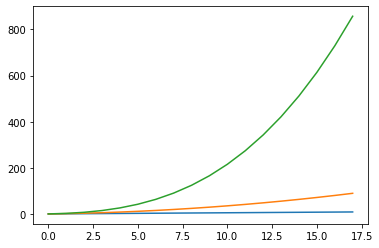

In [3]:
plt.plot(y)
plt.plot(y2)
plt.plot(y3)

In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


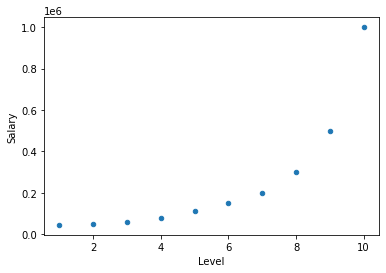

In [5]:
df.plot(kind='scatter',x='Level',y='Salary')
plt.show()

In [6]:
X=df[['Level']]
y=df['Salary']

In [7]:
model_1=LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [8]:
df['pred_1']= model_1.predict(X)

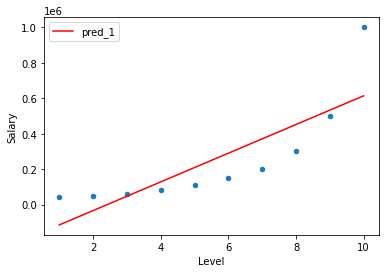

In [9]:
ax= df.plot(kind='scatter',x='Level',y='Salary')
df.plot(x='Level',y='pred_1',color='red',ax=ax)
plt.show()

score 0.9162082221443943


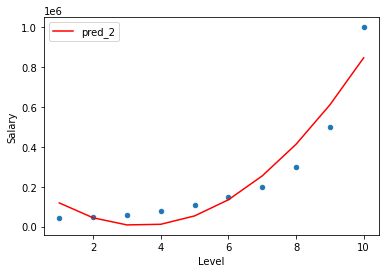

In [10]:
pf = PolynomialFeatures(degree=2)
pX2 = pf.fit_transform(X)
model_2 = LinearRegression()
model_2.fit(pX2,y)
df['pred_2']= model_2.predict(pf.transform(X))
ax= df.plot(kind='scatter',x='Level',y='Salary')
df.plot(x='Level',y='pred_2',color='red',ax=ax)
print('score',model_2.score(pf.transform(X),y))
plt.show()

In [11]:
def check_polynomial_regression(X,y,degree):
    pf = PolynomialFeatures(degree)
    pX = pf.fit_transform(X)
    model = LinearRegression()
    model.fit(pX,y)
    
    df[f'pred_{degree}']= model.predict(pf.transform(X))
    ax= df.plot(kind='scatter',x='Level',y='Salary')
    df.plot(x='Level',y=f'pred_{degree}',color='red',ax=ax)

    mae = mean_absolute_error(y,df[f'pred_{degree}'])
    print('degree',degree,',score',model.score(pf.transform(X),y),', mae=>',mae)
    plt.show()

degree 2 ,score 0.9162082221443943 , mae=> 70218.18181818174


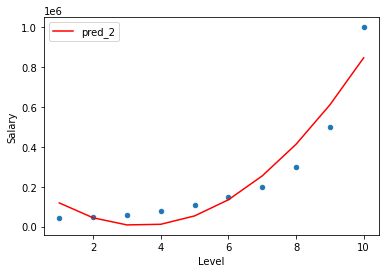

degree 3 ,score 0.9812097727913366 , mae=> 34790.209790209905


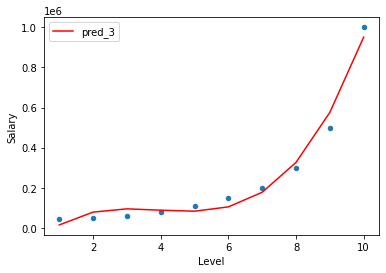

degree 4 ,score 0.9973922891706614 , mae=> 12681.818181823166


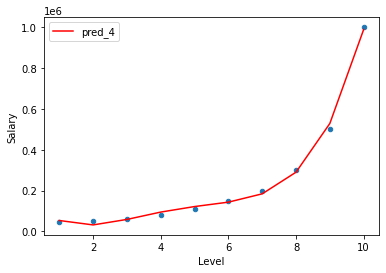

degree 5 ,score 0.9997969027099753 , mae=> 3360.8391609209807


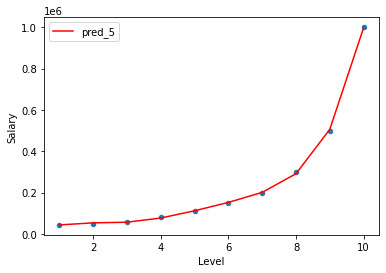

degree 6 ,score 0.9999494749253776 , mae=> 1476.4568763349766


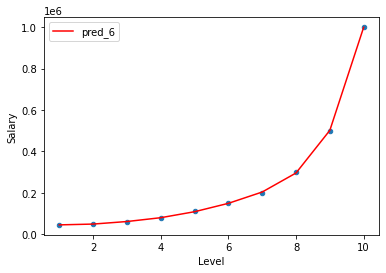

degree 7 ,score 0.9999770143729169 , mae=> 1025.3804995665646


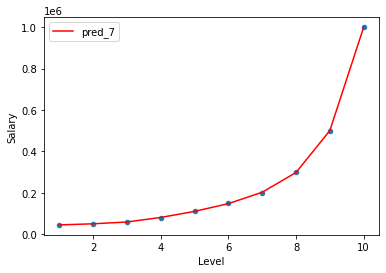

degree 8 ,score 0.9999934972438327 , mae=> 531.7976824018318


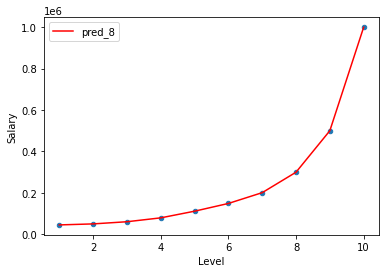

In [13]:
for i in range(2,9):
    check_polynomial_regression(X,y,i)

In [14]:
# final model in this example
p = PolynomialFeatures(degree=8)
m = LinearRegression()
px = p.fit_transform(X)
m.fit(px,y)

LinearRegression()

In [15]:
df

,Position,Level,Salary,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14
0,Business Analyst,1,45000,-114454.545455,118727.272727,14902.097902,53356.643357,43895.104896,45190.559440,44942.204655,45010.385177,44999.971426,4.500000e+04,44999.999957,4.500000e+04,4.500000e+04,4.500000e+04
1,Junior Consultant,2,50000,-33575.757576,44151.515152,78759.906760,31759.906760,53836.829837,49086.829837,50383.792640,49906.521288,50000.006454,5.000000e+04,50000.000477,5.000000e+04,5.000000e+04,5.000000e+04
2,Senior Consultant,3,60000,47303.030303,8439.393939,94960.372960,58642.191142,57065.268066,61383.449884,59010.283800,60373.919866,60000.023910,6.000000e+04,60000.000295,6.000000e+04,6.000000e+04,6.000000e+04
3,Manager,4,80000,128181.818182,11590.909091,88223.776224,94632.867133,77286.713287,79877.622377,81036.610446,79127.520557,80000.003114,8.000000e+04,80000.000360,8.000000e+04,8.000000e+04,8.000000e+04
4,Country Manager,5,110000,209060.606061,53606.060606,83270.396270,121724.941725,112263.403264,108808.857809,110354.175214,111308.720194,110000.018659,1.100000e+05,110000.000268,1.100000e+05,1.100000e+05,1.100000e+05
5,Region Manager,6,150000,289939.393939,134484.848485,104820.512821,143275.058275,152736.596737,149282.051282,147736.733788,148691.278751,150000.028027,1.500000e+05,150000.000205,1.500000e+05,1.500000e+05,1.500000e+05
6,Partner,7,200000,370818.181818,254227.272727,177594.405594,184003.496503,201349.650350,203940.559441,202781.571329,200872.481284,200000.046707,2.000000e+05,200000.000200,2.000000e+05,2.000000e+05,2.000000e+05
7,Senior Partner,8,300000,451696.969697,412833.333333,326312.354312,289994.172494,291571.095571,295889.277389,298262.443490,299626.079363,300000.031147,3.000000e+05,300000.000400,3.000000e+05,3.000000e+05,3.000000e+05
8,C-level,9,500000,532575.757576,610303.030303,575694.638695,528694.638695,506617.715617,501867.715616,500570.752868,500093.481891,499999.980536,5.000000e+05,499999.999189,5.000000e+05,5.000000e+05,5.000000e+05
9,CEO,10,1000000,613454.545455,846636.363636,950461.538462,988916.083916,998377.622376,999673.076923,999921.431769,999989.611629,999999.890017,1.000000e+06,999999.998644,1.000000e+06,1.000000e+06,1.000000e+06


### example2

In [16]:
df = pd.read_csv("processed_automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [17]:
print(df.columns.tolist())

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [18]:
df.sort_values(by='horsepower',inplace=True)
X = df[['horsepower']]
y = df['price']

<AxesSubplot:xlabel='horsepower', ylabel='price'>

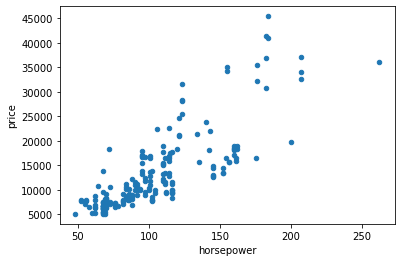

In [19]:
df.plot(kind='scatter',x='horsepower',y='price')

degree 3 ,score 0.6627880537087625 , mae=> 3259.5004239875434


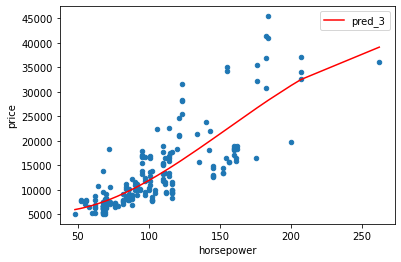

In [20]:
degree= 3
pf = PolynomialFeatures(degree)
pX = pf.fit_transform(X)
model = LinearRegression()
model.fit(pX,y)

df[f'pred_{degree}']= model.predict(pf.transform(X))
ax= df.plot(kind='scatter',x='horsepower',y='price')
df.plot(x='horsepower',y=f'pred_{degree}',color='red',ax=ax)

mae = mean_absolute_error(y,df[f'pred_{degree}'])
print('degree',degree,',score',model.score(pf.transform(X),y),', mae=>',mae)
plt.show()